# Домашнее задание. Решение __[конкурса](https://www.kaggle.com/competitions/advanced-dls-spring-2021)__ на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения. Есть две части ДЗ:

### Отправить предсказания в Stepik
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

* $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

* $0.84 > score \geqslant 0.77$ --- 4 балла

* $0.77 > score \geqslant 0.70$ --- 3 балла

* $0.70 > score \geqslant 0.65$ --- 2 балла

* $0.65 > score \geqslant 0.6$ --- 1 балл

* $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

<details>
    <summary><b>Проблема для российских пользователей Kaggle</b></summary>
    Подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
    <ol>
        <li>Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.</li>
        <li>Если у вас есть не российский номер, используйте его для верификации аккаунта.</li>
        <li>Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.</li>
        <li>Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.</li>
    <ol>
</details>

### Несколько замечаний
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

### Целевая метрика: ROC-AUC

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [101]:
from sklearn.metrics import roc_auc_score

a_true = [
    0,
    1,
    1,
    0,
    1
]

a_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(a_true, a_predictions)

0.8333333333333333

### Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

___

# Первая часть. Исследование

### Imports

In [102]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # yeah, sure buddy

In [103]:
import pandas as pd
import numpy as np
import sklearn as skl
import imblearn as imb

from collections import Counter

Для работы будем использовать основные метрики: `ROC-AUC` и `f1`. У нас несбалансированная выборка (о чем можно узнать по ссылке в введении, а также в анализе датасета ниже), поэтому `accuracy` не подойдет для корректной оценки классификатора. В свою очередь `f1` укажет на ошибки I и II рода.

>`precision` и `recall` используются как второстепенные метрики, т.к. "входят" в метрику `f1`.

In [104]:
from sklearn.metrics import balanced_accuracy_score, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, recall_score

# Просмотр результатов
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Ключевые модели: `DecisionTreeClassifier` и `RandomForestClassifier`. Еще попробуем обучить и протестировать `CatBoost`, который создан для датасета с категориальными признаками:

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.base import clone

Кросс-валидацию для поиска оптимальных параметров будем искать путем `GridSearchCV`, также настроим параметры кросс-валидации через `StratifiedKFold`:

In [106]:
from sklearn.model_selection import GridSearchCV # для поиска оптимальных гиперпараметров
from sklearn.model_selection import StratifiedKFold # для лучшего контроля кросс-валидации

from sklearn.model_selection import cross_val_score

Препроцессинг, трансформация и разбиение данных:

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

>Еще были сделаны шаги для анализа техник балансирования классов, среди них `NearMiss`, `OneSidedSelection`, `ADASYN` и другие:

In [108]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection, NeighbourhoodCleaningRule

In [109]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN

Визуализация:

In [110]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import scikitplot as skplt
from scikitplot.metrics import plot_roc

from sklearn import tree # для демонстрации: как устроено дерево

# Общий стиль графиков
import scienceplots
plt.style.use(['science','no-latex'])

Технические импорты:

In [111]:
from pandas.testing import assert_frame_equal

RANDOM_STATE = 42

## Технические функции

#### ColorMaps

In [112]:
clr_single_light = (0.345, 0.6, 0.969)
clr_single_dark = (0.075, 0.369, 0.8)

In [113]:
def clr_map(data):
    values = len(data)
    assert type(values) == int, 'len(data) должен иметь целочисленный тип'

    red = [0.0] * values
    blue = np.linspace(1.0, 0.0, values)
    green = np.linspace(0.4, 0.0, values)

    # Combine the RGB values into a list of tuples
    rgb_values = list(zip(red, green, blue))
    return rgb_values

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [114]:
data = pd.read_csv('./train.csv')

In [115]:
data.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [116]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [117]:
# Приведем категориальные признаки к нужному типу данных.
data[cat_cols] = data[cat_cols].astype('category')
data[target_col] = data[target_col].astype('category')

# TotalSpent имеет тип object. Приведём его к числовому типу.
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data[num_cols] = data[num_cols].astype('float')

# Теперь у нас все признаки приведены к нужным типам. Можно дальше исследовать данные.
data.dtypes

ClientPeriod                 float64
MonthlySpending              float64
TotalSpent                   float64
Sex                         category
IsSeniorCitizen             category
HasPartner                  category
HasChild                    category
HasPhoneService             category
HasMultiplePhoneNumbers     category
HasInternetService          category
HasOnlineSecurityService    category
HasOnlineBackup             category
HasDeviceProtection         category
HasTechSupportAccess        category
HasOnlineTV                 category
HasMovieSubscription        category
HasContractPhone            category
IsBillingPaperless          category
PaymentMethod               category
Churn                       category
dtype: object

In [118]:
# требование: построить табличку NaN'ов
data_nans = data.isna().sum()
if sum(list(data_nans)) == 0:
    print('NaN-строки отсутствуют')
else:
    print(f'NaN-строки обнаружены в количестве {sum(list(data_nans))} вхождений, а именно:')
    for nan_key in dict(data_nans):
        if (data_nans[nan_key] != 0):
            print(f"{nan_key}: {data_nans[nan_key]}")

NaN-строки обнаружены в количестве 9 вхождений, а именно:
TotalSpent: 9


In [119]:
df_test1 = data[data['TotalSpent'].isna()]
df_test1

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0.0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0.0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0.0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0.0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0.0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0.0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0.0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0.0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [120]:
df_test2 = data[data['ClientPeriod']==0.0].head(15)

assert_frame_equal(df_test1, df_test2, check_exact=True)

Если анализировать объекты с `NaN`-значениями, то можно заметить, что для этих людей значение признака `ClientPeriod` == `0.0`, причем множество элементов, удовлетворяющих условию `ClientPeriod` == `0.0` и `TotalSpent` == `NaN` совпадают! Можно предположить, что это совсем новые клиенты, которые находятся в базе данных оператора, но для которых трекинг еще не начался. Установим для них значения в признаке `TotalSpent` = 0

In [121]:
data['TotalSpent'].fillna(0, inplace=True)
print('Пропущенных значений в TotalSpent: ', data['TotalSpent'].isna().sum(), sep='')

Пропущенных значений в TotalSpent: 0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Первичный анализ: категориальные и числовые признаки

#### Числовые признаки
`ClientPeriod`, `MonthlySpending` и `TotalSpent`

In [122]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


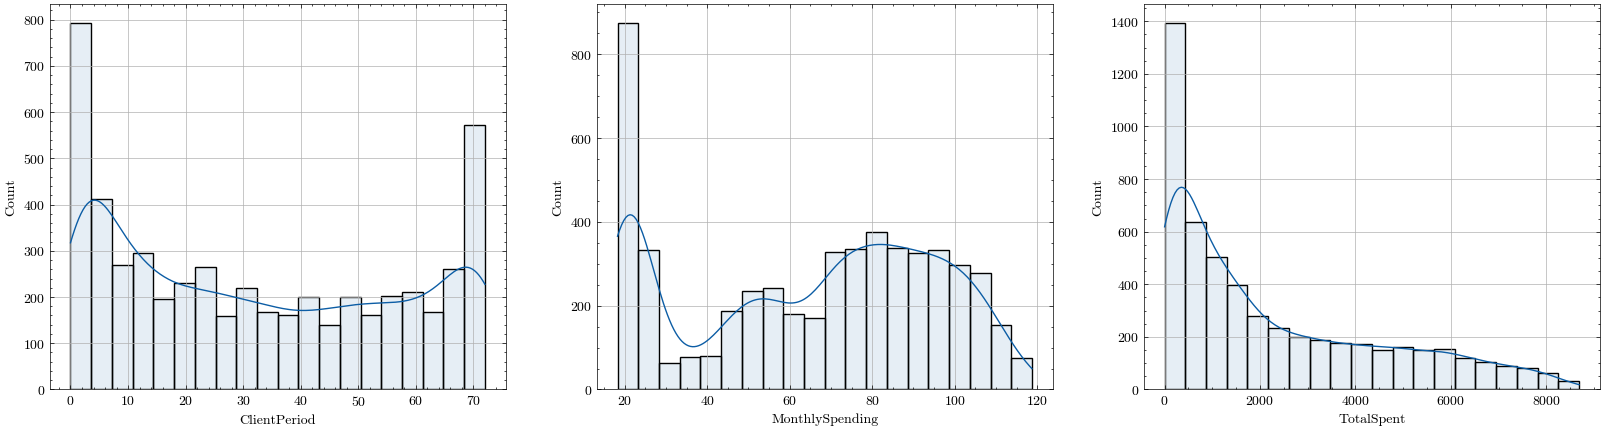

In [123]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for id, name in enumerate(data[num_cols]):
    sns.histplot(data[name], kde=True, bins=20,
                 ax=ax[id], label=name, alpha=0.1)
    ax[id].grid()

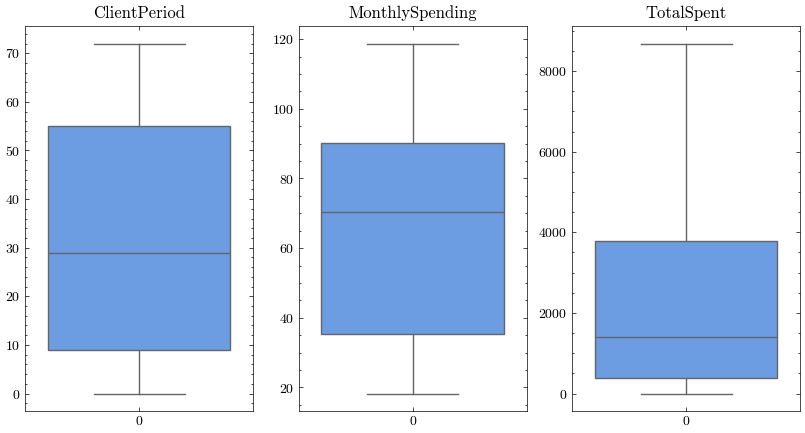

In [124]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols):    
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(data=data[col], color=clr_single_light)
    ax.set_title(col)

#### Категориальные признаки
Все остальные признаки, исключая целевой

In [125]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].replace({0: 'No', 1: 'Yes'})
data['TotalSpent'].fillna(data['ClientPeriod'] * data['MonthlySpending'], inplace=True)

print("В датасете", data.isna().sum().sum(), "пропущенных значений")

В датасете 0 пропущенных значений


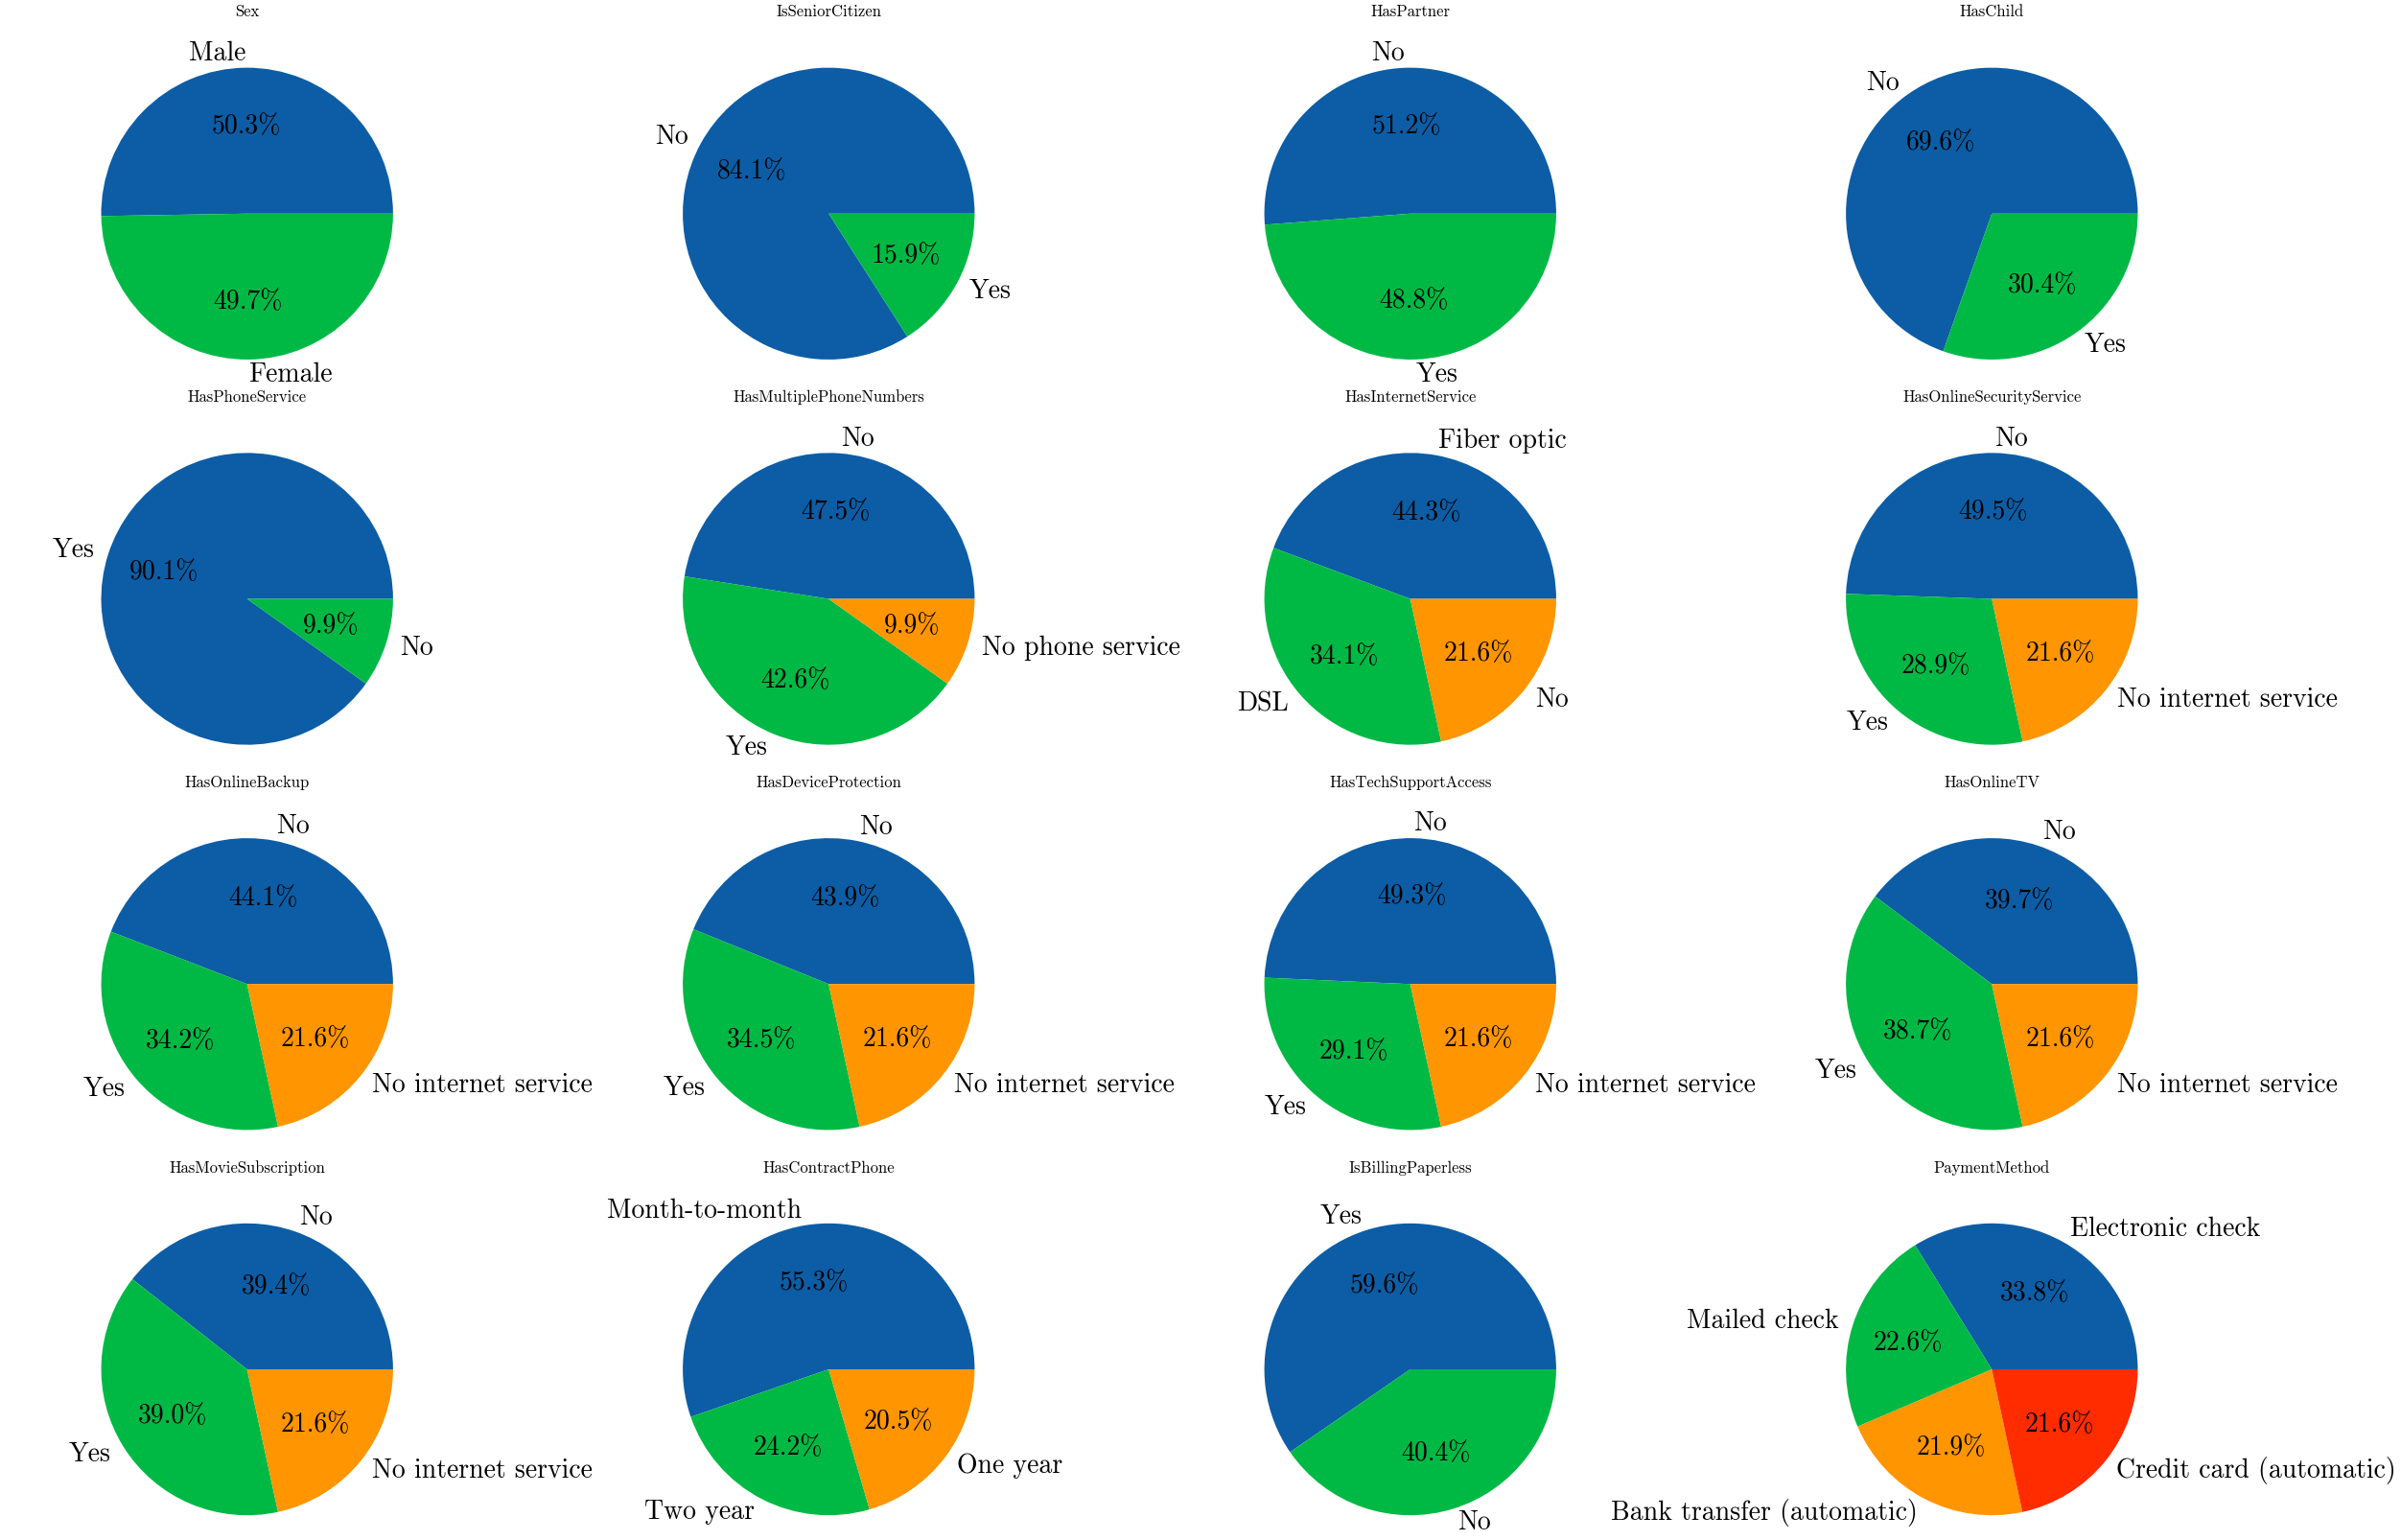

In [126]:
# Визуализация категориальных признаков
fig, axs = plt.subplots(int(0.25 * len(cat_cols)), int(0.25 * len(cat_cols)), figsize=(30,20))

for ax, cat in zip(axs.flat, cat_cols):
    ax.set_title(cat, y=1.09)

    info = data[[cat]].value_counts()

    labels = [i[0] for i in list(info.keys())]
    
    ax.pie(info, labels=labels, autopct='%1.1f%%', textprops={'color':"#000000", 'fontsize':20})#, 'path_effects': [pe.withStroke(linewidth=2, foreground="black")]})#, colors=clr_map(labels),)

    ax.axis('equal')

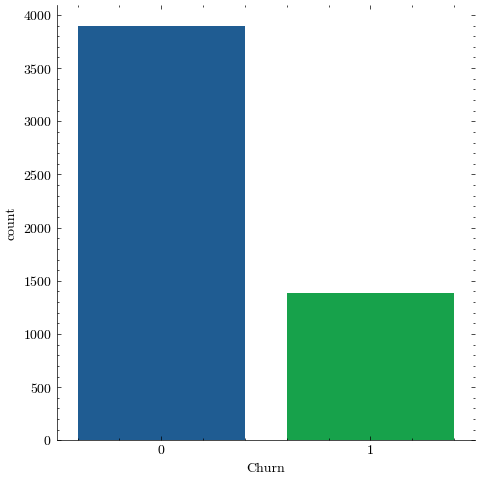

In [127]:
# Отдельно рассмотрим целевую переменную:
sns.catplot(x='Churn', kind='count', data=data)
plt.show()

### Подробный анализ: корреляции и выбор признаков

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

AttributeError: 'int' object has no attribute 'startswith'

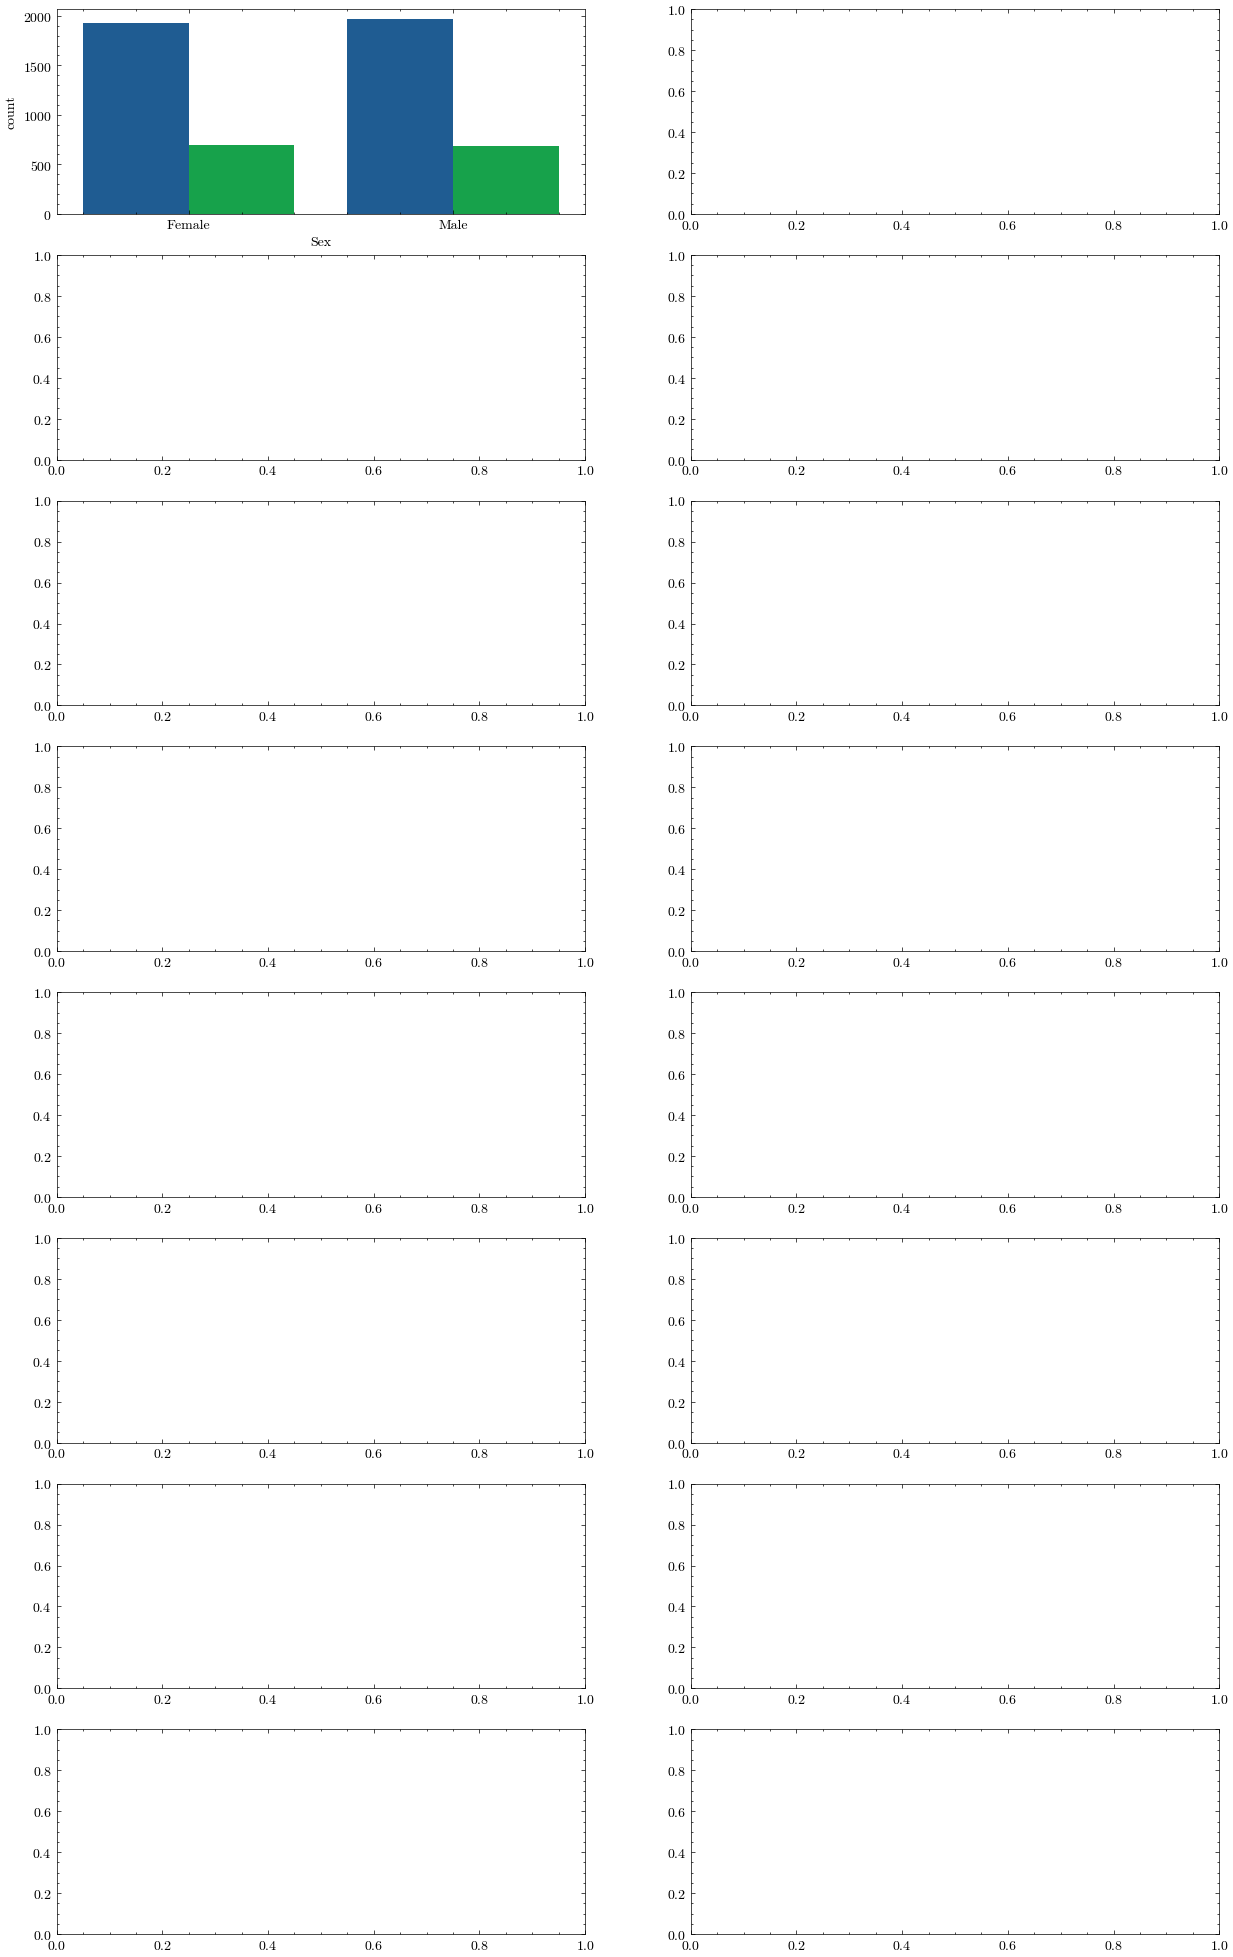

In [130]:
# Сначала посмотрим на зависимость оттока от категориальных признаков.
fig, ax = plt.subplots(8, 2, figsize=(15,25))

counter = 0
for i in range(8):
    for j in range(2):
        sns.countplot(data=data, x=cat_cols[counter], hue='Churn', ax=ax[i,j],
                      #order=data[cat_cols[counter]].value_counts().sort_values(ascending=False).index,
                      )
        
        heights = [p.get_height() for p in ax[i,j].patches]
        patch = [p for p in ax[i,j].patches]
        num_cat = data[cat_cols[counter]].nunique()
        
        for n in range(num_cat):
            total = data[cat_cols[counter]].value_counts().values[n]
            for m in range(2):
                percentage = '{:.1f}%'.format(100*heights[(m*num_cat + n)]/total)
                x = patch[(m*num_cat + n)].get_x() + patch[(m*num_cat + n)].get_width() / 2 - 0.08
                y = patch[(m*num_cat + n)].get_y() + patch[(m*num_cat + n)].get_height()+35
                ax[i,j].annotate(percentage, (x,y), size=12)
        
        ax[i,j].set_title(ax[i,j].get_xlabel())
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylim(0,max(heights)+500)
        counter += 1
plt.tight_layout()
plt.suptitle('Зависимость оттока от категориальных признаков.', y=1.01, fontsize=18)
plt.show()

In [315]:
# Также, проверим данные на выбросы. Мы не будем строить boxplot, но воспользуемся формулировками из этого графика:

for column in data[num_cols]:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if data[(data[column] < lower_bound) | (data[column] > upper_bound)].any(axis=None):
        print("Выбросы найдены в столбце", column)
    else:
        print("Выбросов не найдено в столбце", column)

Выбросов не найдено в столбце ClientPeriod
Выбросов не найдено в столбце MonthlySpending
Выбросов не найдено в столбце TotalSpent


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [316]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder

# следующие модули я добавил сам (кроме make_pipeline - он был забит изначально):
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [317]:
# Скопируем данные в удобном виде
X = data.drop(columns=['Churn'])
y = data['Churn']

# Разбиваем на тестовую и обучающую выборку
X_train, X_valid, y_train, y_valid = train_test_split(X
                                                      , y
                                                      , test_size=0.2)

# Числовые признаки отправим на нормировку, категориальные - на one-hot и label encoder:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# По условию, будем юзать Логистическую регрессию:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(scoring='roc_auc', refit=True, max_iter=1000))
])

model.fit(X_train, y_train)

# Наконец, находим скор:
roc_auc = model.score(X_valid, y_valid)
print(f'ROC-AUC на валидационной выборке: {roc_auc}')

best_C = model.named_steps['classifier'].C_
print(f'Лучший параметр C: {best_C}')

ROC-AUC на валидационной выборке: 0.8495269763956538
Лучший параметр C: [1291.54966501]


Выпишите какое лучшее качество и с какими параметрами вам удалось получить


***ROC-AUC на валидационной выборке: 0.8439018636470865***

***Лучший параметр C: [21.5443469]***

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [318]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

***!!! ВНИМАНИЕ !!!***

Здесь GridSearch катбустов, поиск лучших гиперпараметров занимает около 6 минут.

Лучшая модель приведена в следующем блоке!

In [319]:
# Катбуст яндекса не терпит ванхот, поэтому сформируем матрицу признаков заново (заодно и таргет-вектор):
X = data.drop(columns=['Churn'])
y = data['Churn']

# Разбиение и задание параметров для выбора лучших гиперпараметров:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Обучение
grid_search = GridSearchCV(CatBoostClassifier(), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train, cat_features=cat_cols)

# Результат
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best ROC-AUC score: {best_score}")

0:	learn: 0.6893306	total: 22.6ms	remaining: 2.24s
1:	learn: 0.6856417	total: 47.8ms	remaining: 2.34s
2:	learn: 0.6819670	total: 68.4ms	remaining: 2.21s
3:	learn: 0.6783018	total: 91.3ms	remaining: 2.19s
4:	learn: 0.6747310	total: 112ms	remaining: 2.14s
5:	learn: 0.6712065	total: 133ms	remaining: 2.09s
6:	learn: 0.6678488	total: 153ms	remaining: 2.03s
7:	learn: 0.6646984	total: 174ms	remaining: 2s
8:	learn: 0.6613922	total: 196ms	remaining: 1.98s
9:	learn: 0.6581612	total: 217ms	remaining: 1.95s
10:	learn: 0.6548620	total: 238ms	remaining: 1.93s
11:	learn: 0.6517212	total: 259ms	remaining: 1.9s
12:	learn: 0.6485119	total: 281ms	remaining: 1.88s
13:	learn: 0.6454166	total: 302ms	remaining: 1.86s
14:	learn: 0.6423099	total: 327ms	remaining: 1.85s
15:	learn: 0.6395400	total: 352ms	remaining: 1.85s
16:	learn: 0.6366431	total: 377ms	remaining: 1.84s
17:	learn: 0.6337228	total: 413ms	remaining: 1.88s
18:	learn: 0.6309152	total: 440ms	remaining: 1.88s
19:	learn: 0.6282429	total: 462ms	remaini

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

***Best parameters: {'iterations': 100, 'learning_rate': 0.1}***

***Best ROC-AUC score: 0.8503850293614643***

# Предсказания
(можно тыкать)

In [322]:
# А вот это можно потыкать! Выбрана лучшая модель (лучшие гиперпараметры). Следующий блок генерирует predictions в .csv
X_train = data.drop(columns=['Churn'])
y_train = data['Churn']
best_model = CatBoostClassifier(iterations=100, learning_rate=0.1,verbose=0)
best_model.fit(X_train, y_train, cat_features=cat_cols)

In [330]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
y_pred = best_model.predict_proba(X_test)
print(y_pred)

submission['Churn'] = y_pred[:, 1]
submission.to_csv('./my_submission.csv', index=False)

[[0.95912583 0.04087417]
 [0.38023128 0.61976872]
 [0.32386979 0.67613021]
 ...
 [0.17433607 0.82566393]
 [0.4641407  0.5358593 ]
 [0.98626016 0.01373984]]


Лучшее решение отправьте в Stepik.